In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("prepocessed_lungs_data.csv")

In [3]:
df.head(10)

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [4]:
df.tail(10)

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
299,299,1,65,2,2,2,2,1,2,2,1,1,1,2,2,1,1
300,300,0,63,2,2,2,2,2,2,2,2,1,2,2,2,2,1
301,301,1,64,1,2,2,2,1,1,2,1,2,1,1,2,2,1
302,302,0,65,2,2,2,2,1,2,1,2,1,2,2,2,1,1
303,303,1,51,1,2,1,1,2,2,2,2,2,2,2,1,2,1
304,304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1
308,308,1,62,1,1,1,2,1,2,2,2,2,1,1,2,1,1


In [5]:
df.shape

(309, 17)

In [6]:
df.isnull().sum()

Unnamed: 0               0
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Unnamed: 0             309 non-null    int64
 1   GENDER                 309 non-null    int64
 2   AGE                    309 non-null    int64
 3   SMOKING                309 non-null    int64
 4   YELLOW_FINGERS         309 non-null    int64
 5   ANXIETY                309 non-null    int64
 6   PEER_PRESSURE          309 non-null    int64
 7   CHRONIC DISEASE        309 non-null    int64
 8   FATIGUE                309 non-null    int64
 9   ALLERGY                309 non-null    int64
 10  WHEEZING               309 non-null    int64
 11  ALCOHOL CONSUMING      309 non-null    int64
 12  COUGHING               309 non-null    int64
 13  SHORTNESS OF BREATH    309 non-null    int64
 14  SWALLOWING DIFFICULTY  309 non-null    int64
 15  CHEST PAIN             309 non-null    i

In [8]:
df.describe()

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,154.000000,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,89.344838,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,77.000000,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,154.000000,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,231.000000,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,308.000000,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


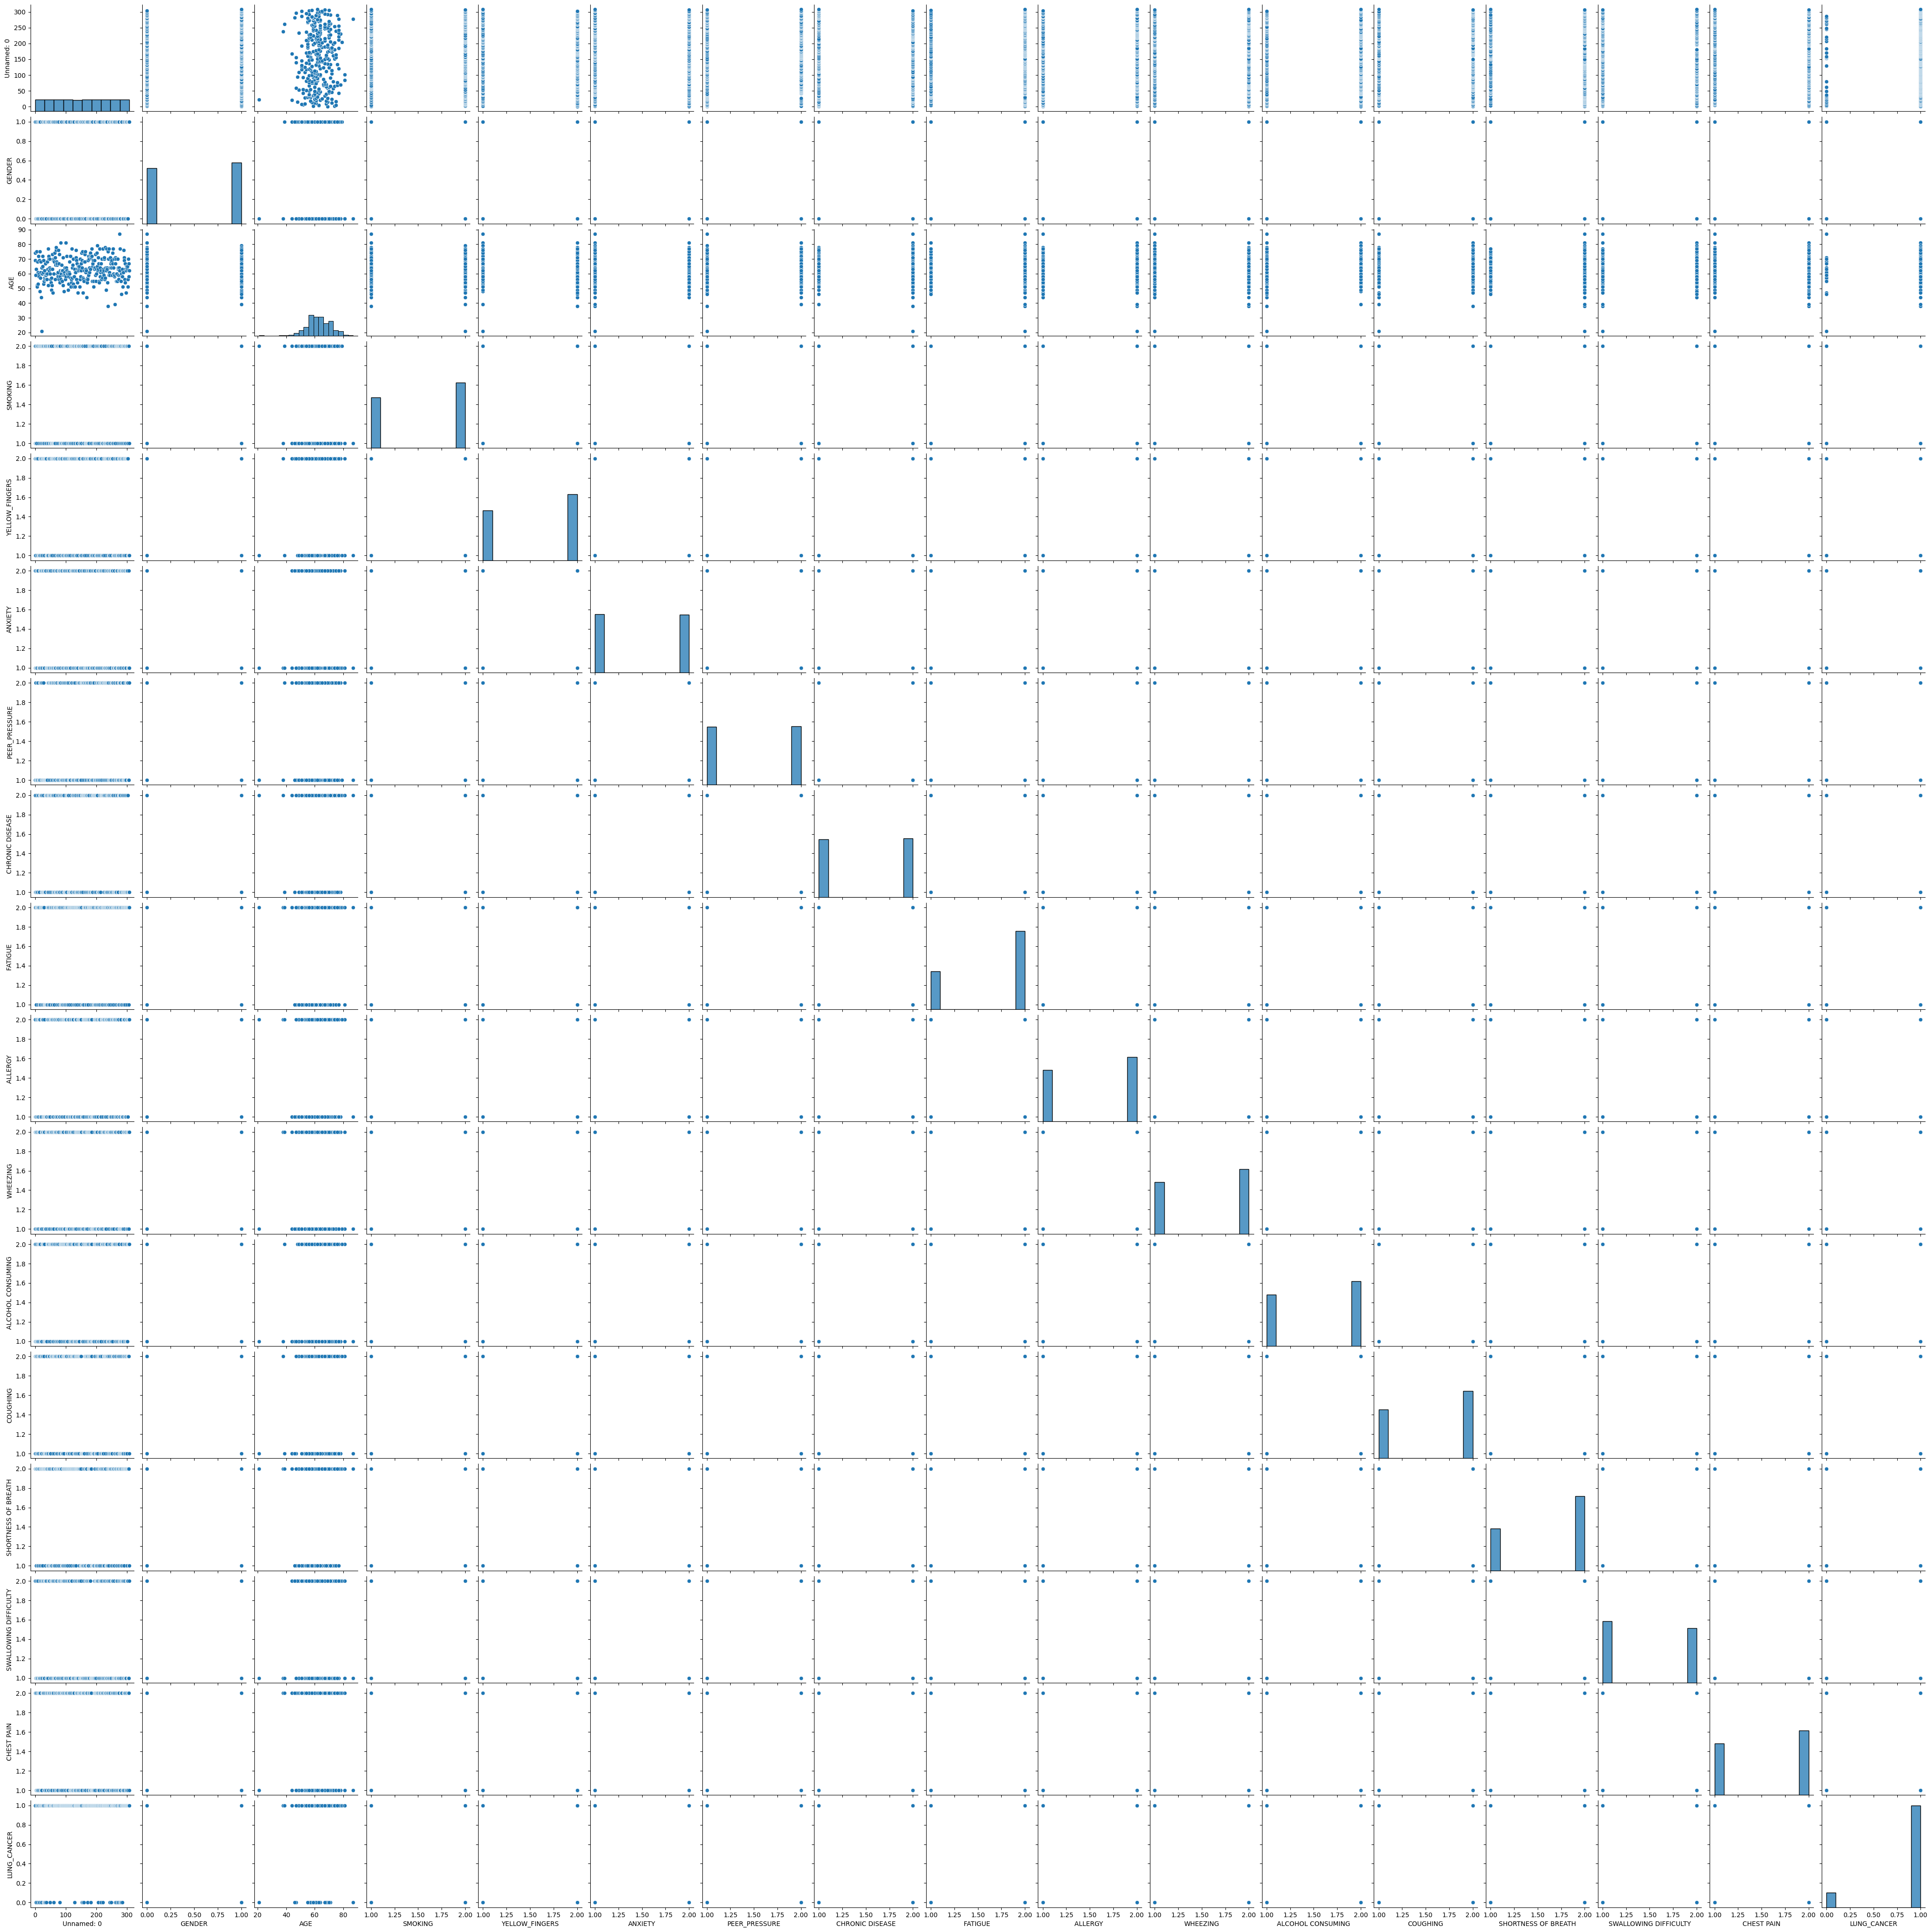

In [9]:
sns.pairplot(df,kind="scatter")

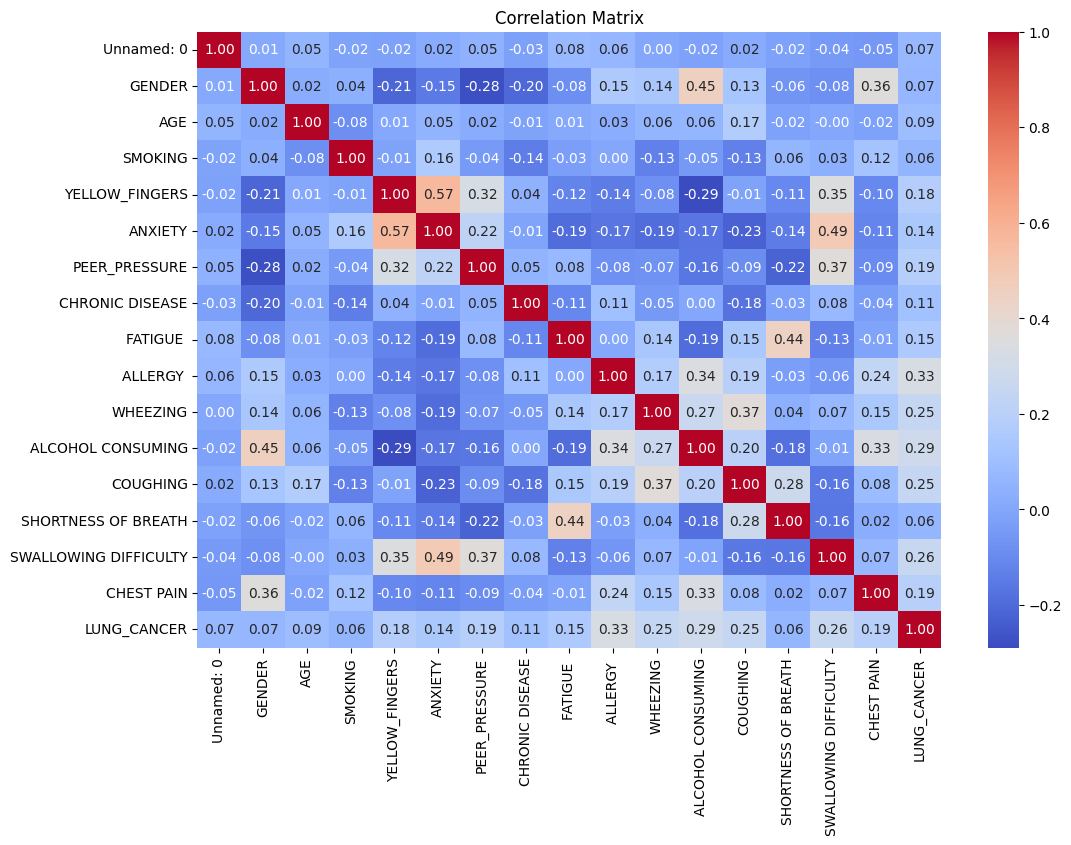

In [10]:
#checking the relation of different column with one another using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# independent and dependent variable
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [13]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier()
model_sc = SVC()

In [14]:
parameter_lr = {
    "penalty":['l1','l2','elasticnet'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
             'max_iter':[100,200,300]
}
parameter_rf ={
    "n_estimators":[50,100,150,200],
    "max_depth":[5,8,10],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[2,4,5],
    "max_features":['auto', 'sqrt', 'log2']
}

parameter_sc ={
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"],
    "degree":[3,5]
}

parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}
parameter_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

parameter_dt ={
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']
}


In [15]:
classifier_regressor_lr=GridSearchCV(model_lr,param_grid=parameter_lr,scoring="accuracy",cv=5)
classifier_regressor_rf=GridSearchCV(model_rf,param_grid=parameter_rf,scoring="accuracy",cv=5)
classifier_regressor_xgb=GridSearchCV(model_xgb,param_grid=parameter_xgb,scoring="accuracy",cv=5)
classifier_regressor_dt=GridSearchCV(model_dt,param_grid=parameter_dt,scoring="accuracy",cv=5)
classifier_regressor_knn=GridSearchCV(model_knn,param_grid=parameter_knn,scoring="accuracy",cv=5)
classifier_regressor_sc=GridSearchCV(model_sc,param_grid=parameter_sc,scoring="accuracy",cv=5)

In [16]:
classifier_regressor_lr.fit(X_train,y_train)
classifier_regressor_sc.fit(X_train,y_train)
classifier_regressor_dt.fit(X_train,y_train)
classifier_regressor_knn.fit(X_train,y_train)
classifier_regressor_xgb.fit(X_train,y_train)
classifier_regressor_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [17]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Logistic Regression:", classifier_regressor_lr.best_params_)
print("Best Score for Logistic Regression:", classifier_regressor_lr.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for RandomForestClassifer:", classifier_regressor_rf.best_params_)
print("Best Score for RandomForestClassifier:", classifier_regressor_rf.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for SVC:", classifier_regressor_sc.best_params_)
print("Best Score for SVC:", classifier_regressor_sc.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Xgboost:", classifier_regressor_xgb.best_params_)
print("Best Score for Xgboost:", classifier_regressor_xgb.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Knearestneighbour:", classifier_regressor_knn.best_params_)
print("Best Score for  Knearestneighbour:", classifier_regressor_knn.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Decisiontreeclassifier:", classifier_regressor_dt.best_params_)
print("Best Score for Decisiontreeclassifier:", classifier_regressor_dt.best_score_)

Best Parameters for Logistic Regression: {'C': 4, 'max_iter': 300, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.9135060129509712
Best Parameters for RandomForestClassifer: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Best Score for RandomForestClassifier: 0.8874190564292321
Best Parameters for SVC: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.9003700277520814
Best Parameters for Xgboost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score for Xgboost: 0.9048103607770581
Best Parameters for Knearestneighbour: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score for  Knearestneighbour: 0.8657724329324699
Best Parameters for Decisiontreeclassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decisiontreeclassifier: 0.8832562

In [18]:
y_pred_lr = classifier_regressor_lr.predict(X_test)
y_pred_rf = classifier_regressor_rf.predict(X_test)
y_pred_sc = classifier_regressor_sc.predict(X_test)
y_pred_knn = classifier_regressor_knn.predict(X_test)
y_pred_dt = classifier_regressor_dt.predict(X_test)
y_pred_xgb = classifier_regressor_xgb.predict(X_test)

In [19]:
score_lr = accuracy_score(y_pred_lr,y_test)
print("score of logistic regression: ",score_lr)
score_knn = accuracy_score(y_pred_knn,y_test)
print("score of kNearestNeigbour Classifierscore_knn:",score_knn)
score_sc = accuracy_score(y_pred_sc,y_test)
print("score of Support Vector Classfier:",score_sc)
score_dt = accuracy_score(y_pred_dt,y_test)
print("score of Decision Tree Classifier:",score_dt)
score_rf = accuracy_score(y_pred_rf,y_test)
print("score of RandomForest Classifier:",score_rf)
score_xgb = accuracy_score(y_pred_xgb,y_test)
print("score of XGBoost Classifier:",score_xgb)

score of logistic regression:  0.9615384615384616
score of kNearestNeigbour Classifierscore_knn: 0.9358974358974359
score of Support Vector Classfier: 0.9615384615384616
score of Decision Tree Classifier: 0.8589743589743589
score of RandomForest Classifier: 0.9358974358974359
score of XGBoost Classifier: 0.9230769230769231


In [20]:
#classification_report 
print("classification report of logistic regression")
print(classification_report(y_pred_lr,y_test))
print("Classification Report of Support Vector Classfier")
print(classification_report(y_pred_sc,y_test))
print("Classification Report of K NearestNeighbour Classifier")
print(classification_report(y_pred_knn,y_test))
print("Classification Report of XGBoost Classifier")
print(classification_report(y_pred_xgb,y_test))
print("Classification Report of RandomForest Classifier")
print(classification_report(y_pred_rf,y_test))
print("Classfication Report of Decision Tree Classifier")
print(classification_report(y_pred_dt,y_test))

classification report of logistic regression
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.99      0.97      0.98        74

    accuracy                           0.96        78
   macro avg       0.79      0.86      0.82        78
weighted avg       0.97      0.96      0.96        78

Classification Report of Support Vector Classfier
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.99      0.97      0.98        74

    accuracy                           0.96        78
   macro avg       0.79      0.86      0.82        78
weighted avg       0.97      0.96      0.96        78

Classification Report of K NearestNeighbour Classifier
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.99      0.95      0.97        76

    accuracy                    

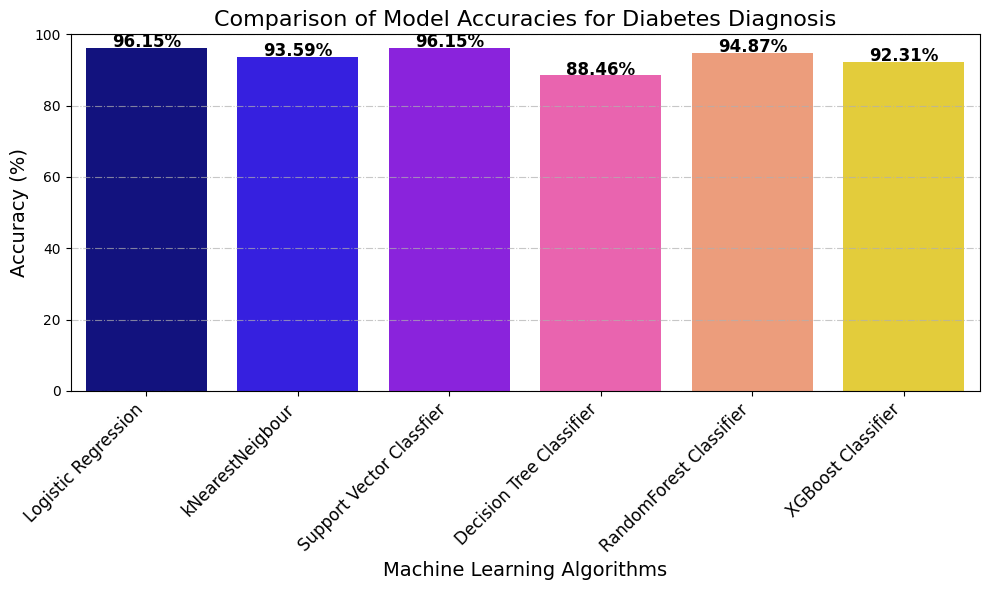

In [21]:
accuracy_results = {
    "Logistic Regression": 96.15384615384616,
    "kNearestNeigbour": 93.58974358974359,
    "Support Vector Classfier": 96.15384615384616,
    "Decision Tree Classifier": 88.46153846153846,
    "RandomForest Classifier": 94.87179487179487,
    "XGBoost Classifier": 92.30769230769231
}
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the barplot with a different color palette
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="gnuplot2")

# Format the plot with labels and title
plt.xlabel("Machine Learning Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies for Diabetes Diagnosis", fontsize=16)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0,100)
# Display the accuracy percentage on top of each bar
for index, value in enumerate(accuracy_results.values()):
    plt.text(index, value + 0.2, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='-.', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
input_data = (0,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier_regressor_sc.predict(input_data_reshaped) #support vector classification is selected 
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Lung Cancer')
else:
  print('The Person has Lung Cancer')

[0]
The Person does not have a Lung Cancer


In [24]:
import pickle

filename = 'lungs_cancer_model.sav'
pickle.dump(classifier_regressor_sc, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('lungs_cancer_model.sav', 'rb'))
